In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
import warnings

warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df=pd.read_csv('C:\Python36-32\project\smsspam',sep='\t',names=['Status','Message'])

In [3]:
df.head()

,Status,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
len(df)

5572

In [5]:
df.loc[df['Status']=='ham','Status']=1

In [6]:
df.loc[df['Status']=='spam','Status']=0

In [7]:
len(df.loc[df['Status']==0])

747

In [8]:
len(df.loc[df['Status']==1])

4825

In [9]:
df['Message'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [10]:
df_x=df['Message']
df_y=df['Status']

# Messages are in text and  we have to convert it into integer for that (countVectorizer) is used

In [11]:
cv=CountVectorizer()

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=0)

In [13]:
X_train_cv=cv.fit_transform(X_train)

In [14]:
X_train_cv=X_train_cv.toarray()


In [15]:
X_train_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
X_train_cv[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
cv.inverse_transform(X_train_cv[0])

[array(['an', 'for', 'good', 'hourish', 'if', 'in', 'is', 'it', 'leave',
        'movie', 'no', 'ok', 'the'], dtype='<U34')]

In [18]:
X_train.iloc[0]

"No I'm good for the movie, is it ok if I leave in an hourish?"

# Now we are using machine learning algorith ie Naive Bayes which is used to classify first applying in CountVectorizer

In [19]:
mnb=MultinomialNB()

In [20]:
Y_train=Y_train.astype('int')

In [21]:
x_testcv=cv.transform(X_test)

In [22]:
mnb.fit(X_train_cv,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
pred=mnb.predict(x_testcv)

In [24]:
pred

array([1, 0, 1, ..., 1, 0, 1])

In [25]:
actual=np.array(Y_test)

In [26]:
count=0

In [27]:
for i,j in zip(pred,actual):
    if(i==j):
        count+=1

In [28]:
count

1101

In [29]:
len(pred)

1115

In [30]:
1101/1115.0

0.9874439461883409

so our accuracy is 0.9874439461883409 using countvectorizer

# Now we are using TfidfVectorizer to see the difference 

In [31]:
tf=TfidfVectorizer(min_df=1,stop_words='english')

In [32]:
x_train_tf=tf.fit_transform(X_train)

In [33]:
a=x_train_tf.toarray()

In [34]:
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
tf.inverse_transform(a[0])

[array(['good', 'hourish', 'leave', 'movie', 'ok'], dtype='<U34')]

In [36]:
X_train.iloc[0]

"No I'm good for the movie, is it ok if I leave in an hourish?"

# Now we are using Tfidfvectorizer to find the accuracy

In [37]:
Y_train=Y_train.astype('int')

In [38]:
x_test_tf=tf.transform(X_test)

In [39]:
mnb1=MultinomialNB()

In [40]:
mnb1.fit(x_train_tf,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
pred2=mnb1.predict(x_test_tf)

In [42]:
pred2

array([1, 1, 1, ..., 1, 0, 1])

In [43]:
actual=np.array(Y_test)
count=0

In [44]:
actual

array([1, 0, 1, ..., 1, 0, 1], dtype=object)

In [48]:
for i,j in zip(pred2,actual):
    if(i==j):
        count+=1

In [49]:
count

2178

In [50]:
len(pred)

1115

In [51]:
1089/1115.0

0.9766816143497757

so our accuracy is 0.9766816143497757 using TidfVectorizer

In [52]:
actual_spam=[]
actual_ham=[]

In [53]:
spam=[]
ham=[]

In [54]:
for i in pred2:
    if(i==0):
        spam.append(i)
    else:
        ham.append(i)

In [55]:
for i in actual:
    if(i==0):
        actual_spam.append(i)
    else:
        actual_ham.append(i)


In [56]:
len(spam)


134

In [57]:
len(actual_spam)

160

In [58]:
134/160.0

0.8375

 accuracy of spam sms is 0.8375

In [59]:
len(ham)

981

In [60]:
len(actual_ham)

955

In [61]:
981/955.0

1.0272251308900524

accuracy of ham sms is 1.0272251308900524

In [62]:
import seaborn as sns

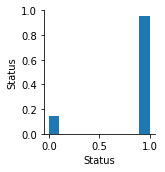

In [63]:
sns.pairplot(df)